In [2]:
"""
计算肌肉力量和特征值的相关性系数计算和显著性检验
"""

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_df = pd.read_csv(r"E:\Data\20230310-iFEMG肌力测试\LiRuya\Lry_bicps_br.csv", header=[0, 1], index_col=0)
data_df.head

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\code\\data\\iFEMG_data_set\\Three_channel_dataset\\LiRuya\\Lry_bicps_br.csv'

In [ ]:
# 获取要进行相关性分析的数据
data_2test = data_df['antagonist_ch2'][['label(kg)', 'FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']]
data_2test.head

<bound method NDFrame.head of     label(kg)  FMG_increase       mav       rms  wave_length  zero_crossing  \
0         0.0      0.068173  0.396347  0.641543    -0.182088      -0.238937   
1         0.0      0.093054  0.103456  0.158986    -0.136970      -0.208587   
2         0.0      0.133377  0.294299  0.416913     0.039544      -0.188784   
3         0.0      0.118255  0.206188  0.328327    -0.092453      -0.162825   
4         0.0      0.121881  0.197040  0.257323    -0.043782      -0.115291   
5         0.0      0.129737  0.401608  0.494001     0.076364      -0.212398   
6         0.0      0.092484  0.159821  0.197069    -0.073421      -0.214420   
7         0.0      0.131146  0.396031  0.475918     0.070081      -0.238027   
8         0.0      0.108812  0.365621  0.497410     0.037570      -0.224544   
9         0.0      0.105620  0.276826  0.331605     0.034435      -0.199000   
10        0.5      0.132476  0.808169  1.171819     0.100447      -0.303545   
11        0.5      0.0

In [ ]:
"""
pearson : Standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
callable: Callable with input two 1d ndarrays and returning a float.
"""
corr_result = data_2test.corr(method="pearson")

# 创建热力图
sns.heatmap(corr_result, annot=True, cmap='coolwarm')

# 显示图形
plt.show()

,label(kg),FMG_increase,mav,rms,wave_length,zero_crossing,slope_sign_change,mean_freq,mean_power_freq
label(kg),1.000000,-0.200705,0.580247,0.483318,0.915095,0.240191,-0.381473,0.135014,-0.236811
FMG_increase,-0.200705,1.000000,0.238586,0.304385,-0.008836,-0.199802,-0.184463,-0.120310,-0.072609
mav,0.580247,0.238586,1.000000,0.983760,0.743917,-0.566301,-0.679936,-0.136389,-0.410531
rms,0.483318,0.304385,0.983760,1.000000,0.657927,-0.606683,-0.701910,-0.211383,-0.461103
wave_length,0.915095,-0.008836,0.743917,0.657927,1.000000,0.038671,-0.425461,0.175212,-0.213291
zero_crossing,0.240191,-0.199802,-0.566301,-0.606683,0.038671,1.000000,0.348996,0.221040,0.184651
slope_sign_change,-0.381473,-0.184463,-0.679936,-0.701910,-0.425461,0.348996,1.000000,0.451530,0.576017
mean_freq,0.135014,-0.120310,-0.136389,-0.211383,0.175212,0.221040,0.451530,1.000000,0.870165
mean_power_freq,-0.236811,-0.072609,-0.410531,-0.461103,-0.213291,0.184651,0.576017,0.870165,1.000000


In [ ]:
# 皮尔逊相关系数的显著性检验
# 各个相关系数检验的统计量
def r_test_statistic(r, n): 
    """# 构建t分布  
    n:样本容量  
    r:相关系数
    """
    if r == 1:
        return 0
    else:
        a = abs(r)
        b = np.sqrt((n - 2) / (1 - r ** 2))
        c = a * b
        return c
 
# 计算各个相关系数检验的统计量
corr_test_stat = corr_result.applymap(lambda x: r_test_statistic(x, len(data_2test)))
print('--------------------------')
print(corr_test_stat)
 
"""
单样本t检验自由度dt=n-1,
独立t检验自由度dt=n-2
配对t检验自由度dt=n/2-1
"""
# 根据显著性水平0.05和自由度n-2=25-2=23， 计算t分布临界值
alpha = 0.05
t_score = stats.t.isf(alpha/2, df = len(data_2test)-2)
print('--------------------------')
print("t_score: ", t_score)
# |t| >= t_score, 表明总体两变量线性相关性显著

--------------------------
                   label(kg)  FMG_increase        mav        rms  wave_length  \
label(kg)           0.000000      1.279439   4.449235   3.447759    14.172144   
FMG_increase        1.279439      0.000000   1.534278   1.995578     0.055185   
mav                 4.449235      1.534278   0.000000  34.227672     6.951905   
rms                 3.447759      1.995578  34.227672   0.000000     5.455920   
wave_length        14.172144      0.055185   6.951905   5.455920     0.000000   
zero_crossing       1.545226      1.273442   4.290896   4.766044     0.241683   
slope_sign_change   2.577182      1.172086   5.790753   6.154200     2.935990   
mean_freq           0.850954      0.756831   0.859783   1.350606     1.111389   
mean_power_freq     1.522181      0.454645   2.811622   3.245171     1.363376   

                   zero_crossing  slope_sign_change  mean_freq  \
label(kg)               1.545226           2.577182   0.850954   
FMG_increase            1.2734

In [ ]:
data_2test.corr(method="spearman")

,label(kg),FMG_increase,mav,rms,wave_length,zero_crossing,slope_sign_change,mean_freq,mean_power_freq
label(kg),1.000000,-0.451211,0.650460,0.583174,0.890008,0.141408,-0.451031,0.035712,-0.310073
FMG_increase,-0.451211,1.000000,-0.166028,-0.102439,-0.317944,-0.322474,0.142334,-0.295122,0.000697
mav,0.650460,-0.166028,1.000000,0.985540,0.795122,-0.410279,-0.650697,-0.138153,-0.382056
rms,0.583174,-0.102439,0.985540,1.000000,0.726655,-0.467247,-0.681359,-0.212195,-0.432578
wave_length,0.890008,-0.317944,0.795122,0.726655,1.000000,0.046864,-0.469686,0.052787,-0.256272
zero_crossing,0.141408,-0.322474,-0.410279,-0.467247,0.046864,1.000000,0.251742,0.404878,0.314634
slope_sign_change,-0.451031,0.142334,-0.650697,-0.681359,-0.469686,0.251742,1.000000,0.301568,0.525610
mean_freq,0.035712,-0.295122,-0.138153,-0.212195,0.052787,0.404878,0.301568,1.000000,0.847213
mean_power_freq,-0.310073,0.000697,-0.382056,-0.432578,-0.256272,0.314634,0.525610,0.847213,1.000000


In [ ]:
len(data_2test)

41

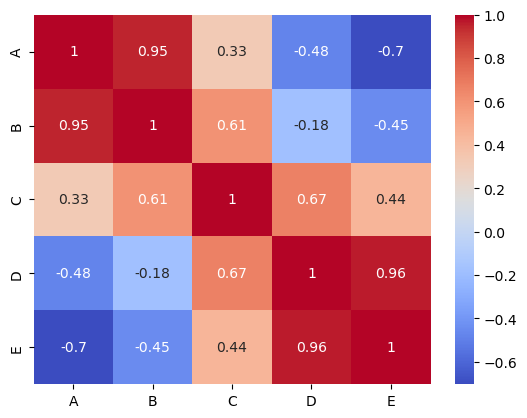

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个示例数据集
data = np.array([
    [1, 2, 3, 4, 5],
    [2, 4, 6, 8, 10],
    [5, 4, 3, 2, 1],
    [10, 8, 6, 4, 2],
    [1, 3, 5, 7, 9]
])

# 将数据转换为DataFrame
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])

# 计算相关性矩阵
correlation_matrix = df.corr()

# 创建热力图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# 显示图形
plt.show()